# Natural Language Processing: Approaches to Text Summarization

Geoffrey Harper
V00866723

## Introduction 

The following report provides a general overview of Text Summarization apporaches and techniques as well as provides as an implementation of the EdgeSumm text summarization system [5]

## What is text summarization and it purpose

Summarizing text in NLP is the proccess of taking a given text an outputing a human-comprehensible summary of the given input. In the era of big data, where we have massive corpuses of data, producing succinct document summaries can be important for many areas of industry. For example, compling Amazon product reviews for a marketing team or having a research data-base present key-inforamtion of journal papers. However, since computers lack the trival understanding of human language creating text summareis that are coherent and correct becomes a very non-trival task [1].  

## Theory and techniques used in the NLP Text summarization field

Text summary can be viewed as a sequence mapping problem. It takes a sequences of words (the given text) and maps it to a new sequences of words (the summary text).

There are two broad main catagoreis of text summarization methods.

1) Abstractive summarization.

2) Extractive summarization.

Abstractive summarization approach creates a summary much like a human would make when abstracting a document. It uses the latest sequence mapping techniques in machine learning such as, encoding and decoding, as well as generative proccesses that will make human like sentances and rephrasings of a given article [1] [2].

Extractive summarization is a model in which the output sequence is a subset of the input text, containing what sentance of the article that are deemed to convey the input texts main ideas [1] [2]. 

## A common approaches to text summariztion:

At the momemnt the cutting edge approach to text summariztion is using a very modern neural-net architecture type called Transformers [3]. This model produces very human like text summariztions. However, as with the common issue with neural-nets, you needs massive amounts of data to train it successfully and even then there could be underlying hidden variables in the data set that can produce unpredicatble resutls in a generalized setting, with no way to look 'under-the-hood' of the neural-net and figure out what the precise problem is. 

Another solution is the method known as Automatic-Text-Summarization (ATS). An ATS can be purly extractive, abstractive or a hybrid of each technique [4]. The basic architecture for ATS can be viewed in the figure below.

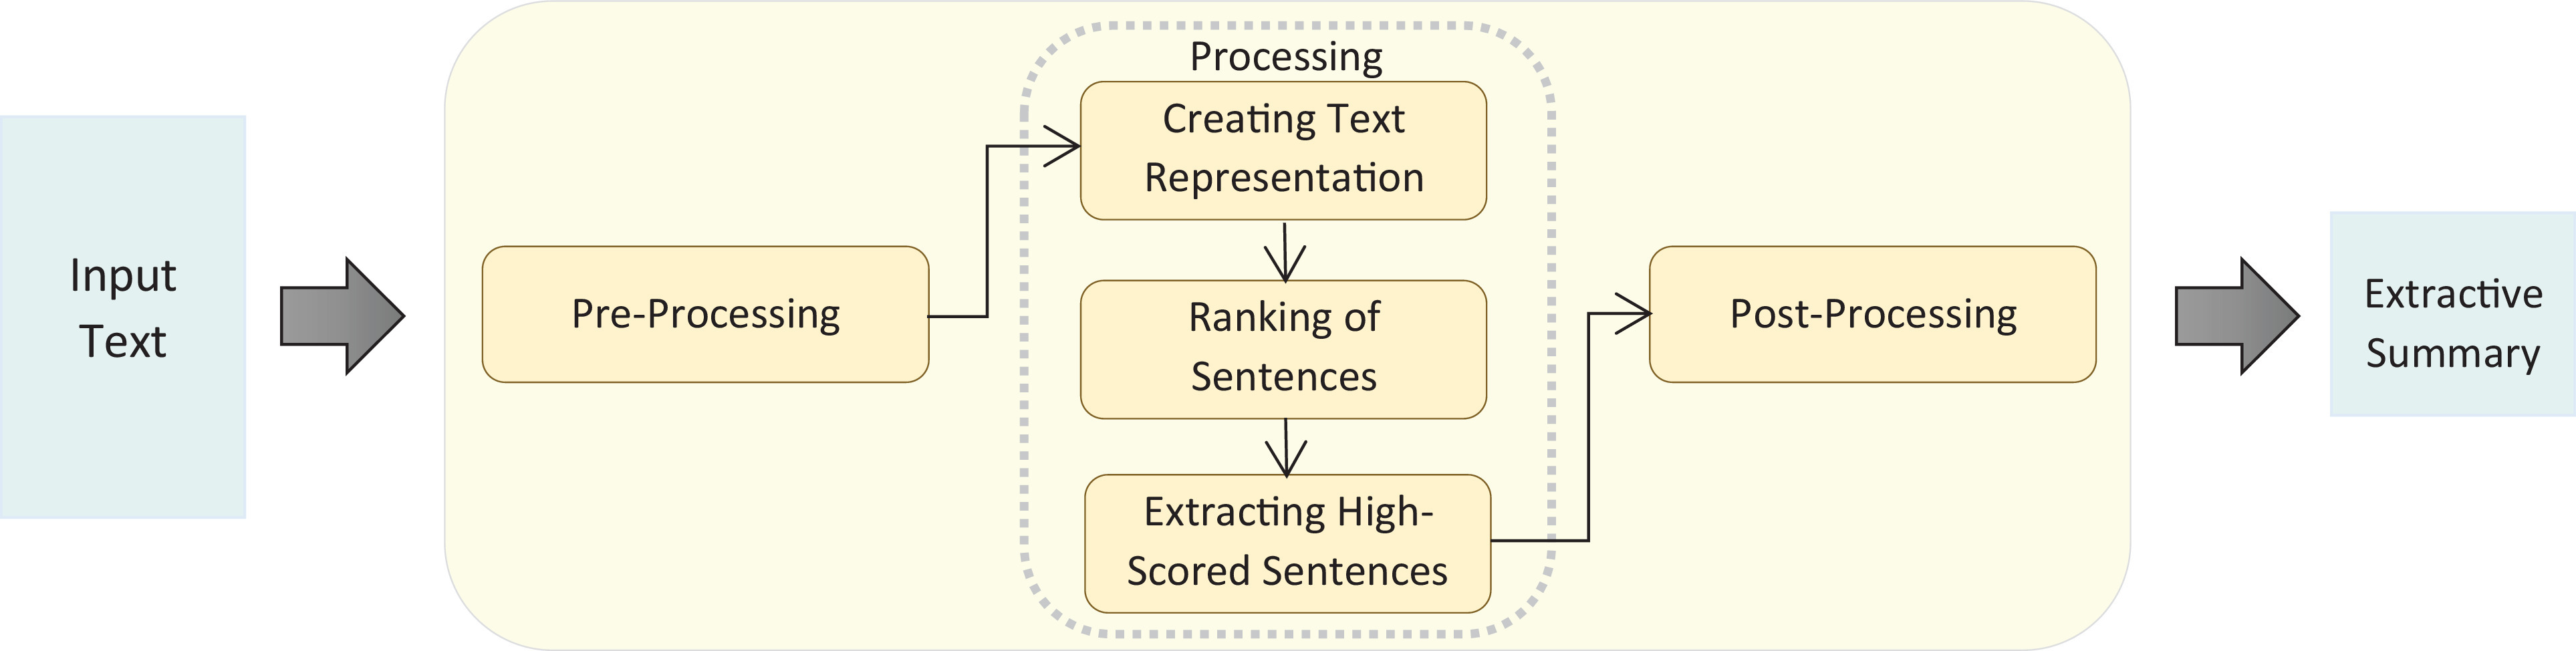

**Figure 1**: Basic architecture of an ATS [5].

## EdgeSumm ATS

For this report the EdgeSumm ATS will be examined based on research in [5] and its subsequent code based provided [6].

### How does EdgeSumm work?

EdgeSumm ATS was published in 2020 by Wafaa S.El-Kassas Et al. as a novel approach to text summarization. The system proposes a new method for extractive single document summariztion using a graph based approach. It attempts to combine a number to extractive methods to benifit from the advantages they provide, as well as propose a new graph model that updates node weights dynamically while the system is being run [5].

Wafaa's paper presents the EdgeSumm system implmentation as follows. 

1) Input and pre-processing
    
        a) Input canidate length you want for your text summary and input your text.

        b) Data is pre-processed

2) Process data

        c) Construction of a text graph model representation for the input document then proceeds. 

        d) Two graph search algorhtims that search constructed graph sentences to be included in candidate summary.

        e) Steps c)-d) interated over with the canidate summary acting as the new input text until a summary is created that is less-than-or-equal-to the input summary length.

        f) If the canidate summary is not converging towards the specified input length then the interated until the generated summary length is stabalized.

3) Post Processing

        a) when summary length has not been met implment a sentence selection algorthim to reduce summary length.
    
        b) Reorder summary sentences based on input textorder.
    
        c) Concatinate sentences and output the final text summary


## Dataset 

The datasets used in the paper for testing and validation where the DUC200 and DUC2001. However, this project will test the system on two very differing datasets. The first dataset is The New York Times Annotated Corpus (NYTAC), and the second dataset is the SAMSum dataset. The NYTAC is a dataset that although isn't written in pure logical preposition is still held to high grammtical english language sentence structure so I belive that the EdgeSumm will produce strong results. SAMSum, on the other hand, is quite the opposite use of the english language. SAMSum is a dataset of text message converstations. Not only does the conversations not flow smoothly, unlike and professional journalists article would, but, ranking the importantce of sentances might be difficult due to the conversation like flow of the messages.

## Loading the Dataset

Read in the reddit Tifu json dataset

In [4]:
import json 

posts = []
with open('tifu_all_tokenized_and_filtered.json', 'r') as fp:
    for line in fp:
        posts.append(json.loads(line))

# Json entries
print(posts[50000].keys())

dict_keys(['title_tokenized', 'permalink', 'title', 'url', 'num_comments', 'tldr', 'created_utc', 'trimmed_title_tokenized', 'id', 'selftext_html', 'score', 'upvote_ratio', 'tldr_tokenized', 'selftext', 'trimmed_title', 'selftext_without_tldr_tokenized', 'ups', 'selftext_without_tldr'])


In [5]:
!pip install beautifulsoup4 markdown

### Clean the dataset by removing all markdown 

Not all data has a summary so only indluced data that has a summary attached for validation purposes.

In [6]:
from bs4 import BeautifulSoup
from markdown import markdown

cleaned_data = []

for p in posts:
    if p['tldr'] != None:
        html = markdown(p['selftext_without_tldr'])
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        cleaned_data.append((text,p['title_tokenized'],p['tldr']))


## Diagram of System Architecture 

The figure below is a graphical representation of how the edgeSumm system works

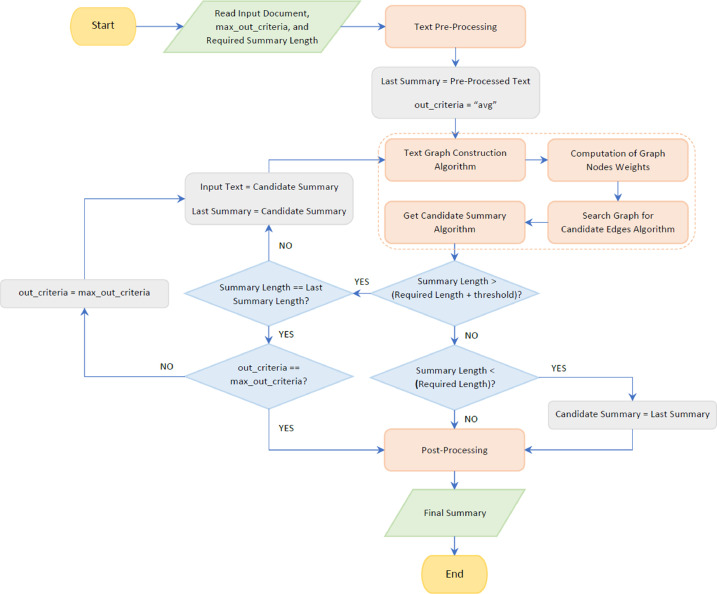

**Figure 2**: Basic architecture of an ATS [5].

## Implmentation of System 

The following is the implementation of the system

### Pre-proccess the data

Data pre-processing. For data-pre-proccessing we will use a common library in the nlp world nltk and the python contractions library to deal with word contractions.

In [7]:
! pip install nltk contractions

In [8]:
# pre-processing based on 
# https://towardsdatascience.com/text-summarization-with-nlp-textrank-vs-seq2seq-vs-bart-474943efeb09
#https://stackoverflow.com/questions/47274540/how-to-improve-nltk-sentence-segmentation
#https://www.nltk.org/_modules/nltk/tokenize/punkt.html

import re
import nltk  
import contractions
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import collections

import numpy as np


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

## create stopwords
lst_stopwords = stopwords.words("english")


### stemming (remove -ing, -ly, ...)
##ps = nltk.stem.porter.PorterStemmer()
##cleaned_sentences = [ps.stem(word) for word in cleaned_sentences]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\inbox\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inbox\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\inbox\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\inbox\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Text Manipulation according to what is decribed in the paper [5]

Sentence segmentation 

In [9]:
#segment sentences using punkt nlp standard algorithm
def sentence_segmentation(text,text_title):
    tokenizer = PunktSentenceTokenizer()
    tokenizer.train(text)
    sentences = tokenizer.tokenize(text)
    title = text_title

    #remove hypens
    cleaned_sentences = [x.replace('-',' ') for x in sentences]
    #remove contractions
    cleaned_sentences = [contractions.fix(x) for x in cleaned_sentences ] 
    cleaned_sentences = [re.sub(r'[^\w\s]', '', x) for x in cleaned_sentences]


    #tokenize each sentence
    #cleaned_sentences = [x.split() for x in cleaned_sentences]
    return cleaned_sentences, title


print(sentence_segmentation(cleaned_data[0][0],cleaned_data[0][1]))
print(cleaned_data[0][0])

(['this actually happened a couple of years ago', 'i grew up in germany where i went to a german secondary school that went from 5th to 13th grade we still had 13 grades then they have since changed that', 'my school was named after anne frank and we had a club that i was very active in from 9th grade on which was dedicated to teaching incoming 5th graders about anne franks life discrimination anti semitism hitler the third reich and that whole spiel', 'basically a day where the students classes are cancelled and instead we give them an interactive history and social studies class with lots of activities and games', 'this was my last year at school and i already had a lot of experience doing these project days with the kids', 'i was running the thing with a friend so it was just the two of us and 30 something 5th graders', 'we start off with a brief introduction and brainstorming what do they know about anne frank and the third reich', 'you would be surprised how much they know', 'anyw

Remove stop-words

In [7]:
#remove stop-words (Words that can be removed and still keep the importance of the sentence )
def remove_stop_words (cleaned_sentences,title,lst_stopwords):
    txt = []
    for lst_txt in cleaned_sentences:
        lst_txt = [word for word in lst_txt if word not in lst_stopwords]
        txt.append(lst_txt)

    cleaned_sentences = txt
    title = [word for word in title if word not in lst_stopwords]

    cleaned_sentences.insert(0,title) #define title at the first sentence in the given text
    
    return cleaned_sentences

cleaned_sentences, title = sentence_segmentation(cleaned_data[0][0],cleaned_data[0][1])

cleaned_sentences = remove_stop_words(cleaned_sentences,title,lst_stopwords)


Standardize synonyms

In [16]:
# standardize synonyms
# the edgeSumm paper describes this as being an important point for weighting tranisition words
# if there are synonyms in the texts words 
# we want these synonyms to be the same so the edge weight calculations in the graph are normalized

# standarizing synonyms will be implemented by the following

# prepare list of synonyms for each word
# create a key-value list where the key is the word and the value is it's list of synonyms

def standardize_synonyms(cleaned_sentences):

    syns_list = []

    #create list of words
    word_lst = [inner for outer in cleaned_sentences for inner in outer]
    word_lst = list(set(word_lst)) #remove_duplicates

    # create dictionary of synonyms
    for word in word_lst:
        synonyms = []
        for syn in wordnet.synsets(word):
            for l in syn.lemmas():
                synonyms.append(l.name())
        syns_list.append(synonyms)
        
    synonyms_dict = dict(zip(word_lst,syns_list))
  
    normalized_words = []

    for lst_txt in cleaned_sentences: #pick the normailzed word to be the first synonym in the word synonym list
        txt = []
        for i in range(len(lst_txt)):
            if len(synonyms_dict[lst_txt[i]]) != 0:
                lst_txt[i] = synonyms_dict[lst_txt[i]][0]
            txt.append(lst_txt[i])
        
        normalized_words.append(txt)
        
    return normalized_words

normalized_words = standardize_synonyms(cleaned_sentences)



In [17]:
#create bi-grams. bi-grams that are repeated more than once are added to a list of frequent bi-grams

def bi_grams_by_frequency(normalized_words):
    
    bi_grams = list(nltk.bigrams(normalized_words))

    flattened_bi_grams = [item for sublist in bi_grams for item in sublist]

    tupled_bi_grams = [tuple(x) for x in flattened_bi_grams]


    #build frequency dictionary
    freq = {}

    for item in tupled_bi_grams:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

    #filter for bi-grams that appear more than once
    bi_grams_freq = [ (list(tup),freq[tup]) for tup in freq if freq[tup] > 1]
    
    return bi_grams_freq, bi_grams

bi_grams_freq, bi_grams = bi_grams_by_frequency(normalized_words)



In [18]:
#tag bi-grams by word type and filter so only adjectives and nouns stay
#this is used for graph node-wieghting

#input a bi_gram list where each tuple is are a list of bi-grams 
def tag_bi_grams(bi_grams):
    
    tagged_sentences = [nltk.pos_tag(sentence[0]) for sentence in bi_grams]

    #print(tagged_sentences)

    bi_gram_tags = [item for sublist in tagged_sentences for item in sublist  if item[1] == "JJ" or item[1] == 'NN']
    
    bi_gram_tags = []
    
    
    for bi_gram in tagged_sentences:
        lst = []
        for w in bi_gram:
            if w[1] == 'JJ' or w[1] == 'NN':
                lst.append(w)
        bi_gram_tags.append(lst)
        
    return bi_gram_tags

bi_gram_tags = tag_bi_grams(bi_grams)



Word frequency of the text.

In the paper the word frequency is determined by the following.

Word freq = word_freq_given_document_title + word_freq_given_keywords + word_freq_given_list_of_sentences

In [19]:
def word_frequency(normalized_words,keywords):
    words_in_title = normalized_words[0]
    words_in_text = [item for sublist in range(1,len(normalized_words)) for item in normalized_words[sublist]]
    
    ### lemmatization (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    words_in_text = [lem.lemmatize(word) for word in words_in_text]
    words_in_title = [lem.lemmatize(word) for word in words_in_title]
    
    
    frequency = {}

    # iterating over the list
    for item in words_in_text:
       # checking the element in dictionary
        if item in frequency:
        # incrementing the count
            frequency[item] += 1
        else:
            # initializing the count
            frequency[item] = 1
        if item in words_in_title:
            frequency[item] += 1
        if item in keywords:
            frequency[item] += 1
    
    return frequency
    


Putting it all together.

Below we preform all the text-manipulation steps needed to run the EdgeSumm algorithm.
What will be returned will be a list of nouns and adjectives for each bi-gram, bi-grams with frequency greater than 1,
a dictionary of sentences in zero-based numbering format with the 0th sentence being the title of the text, if the title exists.

In [12]:


def text_manipulation(text,text_title,keywords):
    cleaned_sentences, title = sentence_segmentation(text,text_title)
    
    segmented_sentences = cleaned_sentences
    
    #tokenize each sentence
    cleaned_sentences = [x.split() for x in cleaned_sentences]
    cleaned_sentences = remove_stop_words(cleaned_sentences,title,lst_stopwords)
    
    normalized_words = standardize_synonyms(cleaned_sentences)
    
    bi_grams_freq, bi_grams = bi_grams_by_frequency(normalized_words)
    
    bi_gram_tags = tag_bi_grams(bi_grams)
    
    word_freq = word_frequency(normalized_words,keywords)
    
    
    #create sentences dictionary 
    lst = range(len(normalized_words))
    sentences_dict = dict(zip(lst, normalized_words))
    
    lst = range(len(segmented_sentences))
    segmented_sentences = dict(zip(lst,segmented_sentences))
    
    return sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences

sentences_dict, word_freq, bi_grams_freq, bi_gram_tags,segmented_sentences = text_manipulation(cleaned_data[0][0],cleaned_data[0][1],[])


## Graph construction and graph iteration proccess

After text has been pre-processed a graphical representation is created from the input text with edge weights.

The following code implements based on [5] and [6].

### Build graph 

The following implments the pseudo-code in the figure below

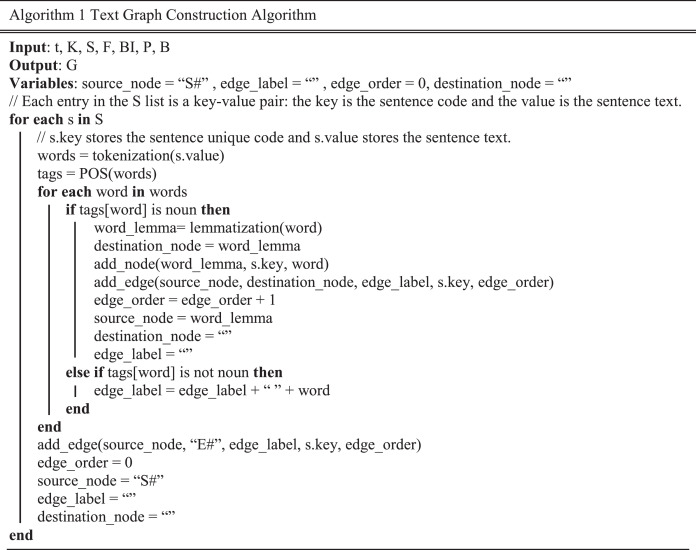

**Figure 3 graph construction [5]**

input:

    - sentence dictionary S
    - title of document t
    - computed word-frequency F
    - frequent bi-grams BI
    - nouns of document P
    - list of keywords K
    - list of domain specific or biased words B

output a text graph G

note by definition of how the data was processed in the first sentence is the title

In [13]:
!pip install networkx 
#use this library for graph building

In [14]:
import networkx as nx

def text_graph_construction(S):
    G = nx.Graph()
    t = S[0]
    S.pop(0)
    for key in S:
        edge_order = 0
        source_node = 'S#'
        edge_label = ''
        destination_node = ''
        words = S[key]
        tagged_words = nltk.pos_tag(words)
        for word in tagged_words:
            if word[1] == 'NN': #word is a noun
                lem = nltk.stem.wordnet.WordNetLemmatizer()
                lem_word = lem.lemmatize(word[0])
                destination_node = lem_word
                G.add_node(lem_word,key = key,word= word[0], weight = 0)
                G.add_edge(source_node,destination_node,edge_label=edge_label,key=key,edge_order=edge_order)
                edge_order += 1
                source_node = lem_word
                edge_label = ''
                destination_node = ''
            elif word[1] == 'JJ': #word is adjective
                edge_label = word[0]
        G.add_edge(source_node,"#E",edge_label=edge_label,key=key,edge_order=edge_order)

        
    return G
        
    

keywords = []
domain_words = []
sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(cleaned_data[0][0],cleaned_data[0][1],[])
G = text_graph_construction(sentences_dict)

print(list(G.nodes(data=True)))
print(list(G.edges(data=True)))

[('couple', {'key': 1, 'word': 'couple', 'weight': 0}), ('S#', {}), ('old_age', {'key': 11, 'word': 'old_age', 'weight': 0}), ('#E', {}), ('turn', {'key': 2, 'word': 'turn', 'weight': 0}), ('school', {'key': 5, 'word': 'school', 'weight': 0}), ('travel', {'key': 2, 'word': 'travel', 'weight': 0}), ('class', {'key': 37, 'word': 'class', 'weight': 0}), ('change', {'key': 14, 'word': 'change', 'weight': 0}), ('name', {'key': 25, 'word': 'name', 'weight': 0}), ('entrance', {'key': 3, 'word': 'entrance', 'weight': 0}), ('grader', {'key': 6, 'word': 'grader', 'weight': 0}), ('life', {'key': 38, 'word': 'life', 'weight': 0}), ('discrimination', {'key': 3, 'word': 'discrimination', 'weight': 0}), ('semitism', {'key': 3, 'word': 'semitism', 'weight': 0}), ('one-third', {'key': 3, 'word': 'one-third', 'weight': 0}), ('spiel', {'key': 3, 'word': 'spiel', 'weight': 0}), ('day', {'key': 41, 'word': 'day', 'weight': 0}), ('student', {'key': 29, 'word': 'student', 'weight': 0}), ('cancel', {'key': 4,

### Compute node weight

Node weight for each noun is given by a custom weighting equation to deem the importance of each word. The weighting formula will be an adapted formula from [5]

The formula for each node will be given by the following equation. given, i $\in$ { words-in-text }

node_weight_i = word_freq_of_i + word_freq_i_in_title + word_freq_i_in_bi_grams

In [15]:
import copy

def compute_node_weights(G,word_freq,title,bi_grams_freq,key_words):
    grams = [item for sublist in bi_grams_freq for item in sublist[0]]
    grams_freq = collections.Counter(grams)
    title_freq = collections.Counter(title)
    key_word_freq = collections.Counter(key_words)
    
    syns_list = []
    title = list(set(title)) #remove_duplicates
    
    ### stemming (remove -ing, -ly, ...)
    ps = nltk.stem.porter.PorterStemmer()
    cleaned_sentences = [ps.stem(word) for word in title]

    # create dictionary of synonyms
    for word in title:
        synonyms = []
        for syn in wordnet.synsets(word):
            for l in syn.lemmas():
                synonyms.append(l.name())
        syns_list.append(synonyms)
    
    synonyms_dict = dict(zip(title,syns_list))
  
    normalized_words = []

    for i in range(len(title)):
        if len(synonyms_dict[title[i]]) != 0:
            title[i] = synonyms_dict[title[i]][0]
            normalized_words.append(title[i])
            
    title = normalized_words
    #print(synonyms_dict)
    
    for node in G.nodes:
        if node in word_freq.keys():
            G.nodes[node]['weight'] += word_freq[node]
        if node in grams_freq.keys():
            G.nodes[node]['weight'] += grams_freq[node]
        if node in title_freq.keys():
            G.nodes[node]['weight'] += title_freq[node]
        if node in key_word_freq:
            G.nodes[node]['weight'] += key_word_freq[node]

    return G
    
keywords = []
domain_words = []
sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(cleaned_data[0][0],cleaned_data[0][1],[])
S = copy.deepcopy(sentences_dict)
G = text_graph_construction(S)

G = compute_node_weights(G,word_freq,sentences_dict[0],bi_grams_freq,keywords)

print(list(G.nodes(data=True)))



[('couple', {'key': 1, 'word': 'couple', 'weight': 2}), ('S#', {}), ('old_age', {'key': 11, 'word': 'old_age', 'weight': 4}), ('#E', {}), ('turn', {'key': 2, 'word': 'turn', 'weight': 2}), ('school', {'key': 5, 'word': 'school', 'weight': 6}), ('travel', {'key': 2, 'word': 'travel', 'weight': 4}), ('class', {'key': 37, 'word': 'class', 'weight': 22}), ('change', {'key': 14, 'word': 'change', 'weight': 4}), ('name', {'key': 25, 'word': 'name', 'weight': 12}), ('entrance', {'key': 3, 'word': 'entrance', 'weight': 2}), ('grader', {'key': 6, 'word': 'grader', 'weight': 4}), ('life', {'key': 38, 'word': 'life', 'weight': 4}), ('discrimination', {'key': 3, 'word': 'discrimination', 'weight': 2}), ('semitism', {'key': 3, 'word': 'semitism', 'weight': 2}), ('one-third', {'key': 3, 'word': 'one-third', 'weight': 4}), ('spiel', {'key': 3, 'word': 'spiel', 'weight': 2}), ('day', {'key': 41, 'word': 'day', 'weight': 9}), ('student', {'key': 29, 'word': 'student', 'weight': 6}), ('cancel', {'key': 

### Search the graph using EdgeSumms node-weight algorithm

The algorthim is based off the figure below. It searches the text graph for candidate edges that link between the high-weighted source and destination nodes.

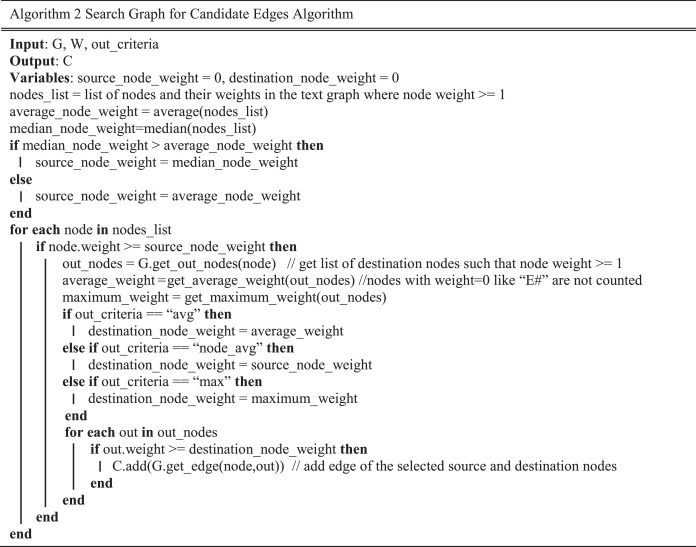
**Figure 4 Edgesumm search algorithm [5]**

This search algorthim has been experimentally developed. However this problem falls under a group of graph problems called node-weighted Steiner Trees [7]. These probelems optimize graph paths for weighted nodes reaching some end-target goal. They iterate through the graph, based on some optimizing heuristic. Steiner Tree's are NP-hard.

'The value of out_criteria could be “avg” (i.e. the default value) for an average value of the destination nodes weights, “node_avg” to use the “source node weight” value for selecting the destination nodes, or “max” for a maximum value of the destination nodes weights' [5].

In [16]:
# We will choose our graph search heuristic to be average weight for destination node.
# Thus, out criteria will be based on average node_weight for our implmentation. 
#Consider other heuristic it can miss it sometimes.

def graph_search(G,mode):
    source_node_weight = 0
    destination_node_weight = 0  
    out_nodes = []
    
    C = [] #list of edges to be used in summary
    
    node_list = [(node,G.nodes[node]) for node in G.nodes if len(G.nodes[node]) != 0]
                   
    #get graph weights
    weights = []
    for node in G.nodes.data("weight"):
        if node[1] != None:
            weights.append(node[1])
    mean = np.mean(weights)
    median = np.median(weights)

    #pick a point where to start search
    if median > mean:
        source_node_weight = median
    else:
        source_node_weight = mean
    
    #begin graph traversal 
    for node in node_list:
        if node[1]['weight'] >= source_node_weight:
            out_nodes = list(nx.neighbors(G,node[0]))
            avg, med = med_and_mean(out_nodes,G,mean,median)
            # find max weight from out_nodes
            if mode == 'max':
                destination_node_weight = max_weight(out_nodes,G)
            if mode == 'avg':
                destination_node_weight = avg
            if mode == 'med':
                destination_node_weight = med
        for out in out_nodes:
            if (len(G.nodes[out])) != 0: #if node is not node #S or #E
                if G.nodes[out]['weight'] >= destination_node_weight: #pick all the nodes whose edges have the max weight criteria
                    C.append(list(G.edges(out)))
    return C
    
    
def max_weight(out_nodes,G):
    weight = 0
    for node in out_nodes:
        if len(G.nodes[node]) != 0 :
            if G.nodes[node]['weight'] > weight:
                weight = G.nodes[node]['weight']
            
    return weight

def med_and_mean(out_nodes,G,mean,median):
    weights = []
    for node in out_nodes:
        if len(G.nodes[node]) != 0:
            weights.append(G.nodes[node]['weight'])
    
    if len(weights) != 0: #covers edge case that the weights list is empty i.e out_nodes are [#S,#E]  
        mean = np.mean(weights)
        median = np.median(weights)
    
    return mean, median

keywords = []
domain_words = []
sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(cleaned_data[0][0],cleaned_data[0][1],[])
S = copy.deepcopy(sentences_dict)
G = text_graph_construction(S)

G = compute_node_weights(G,word_freq,sentences_dict[0],bi_grams_freq,keywords)

C = graph_search(G,'max')

print(G[C[0][0][1]][C[0][0][1]])


{'edge_label': 'thirteen', 'key': 2, 'edge_order': 4}


In [17]:
### Iteration proccess to deem if summary length has met sentances threshold

### Create canidate summary text

The canidate summary algorithm is based on the following figure below.

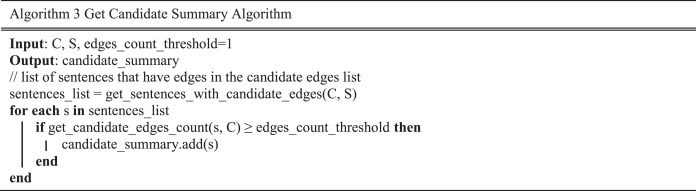

**Figure 5** Edgesumm canidate summary algorthim [5].

Algorithm 3 is used to select sentences for the candidate summary. Based on the candidate edges list generated from Algorithm 2 and to narrow the selection of sentences, an edge count threshold is used such that a sentence will be selected if it has candidate edges count greater than or equal to an edges count threshold. But if the threshold value is high, a short sentence with few edges will not be selected this way. Moreover, a whole document or its most important sentences may be short sentences. Therefore, the threshold value is selected to be 1 so a sentence will be selected for the candidate summary if it has at least one candidate edge. This will give a chance to important sentences that are short with fewer edges as well as the longer sentences. **REWRITE**

In [18]:
def canidate_summary(G,S,C):
    sentences = []
    
    for edge_list in C:
        for vertex_pair in edge_list:
            edge = G[vertex_pair[0]][vertex_pair[1]]
            #get the sentence determined by the edge
            #sentences list is a tuple (sentence,key) so we can order the output by sentence number 
            # sentence number = key, which is organized in a zero-base numbering fashion
            if edge['key'] in S:
                sentences.append((S[edge['key']],edge['key'])) 
            
    sens = set(sentences)
    return list(sens)
                

sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(cleaned_data[0][0],cleaned_data[0][1],[])
S = copy.deepcopy(sentences_dict)
G = text_graph_construction(S)

G = compute_node_weights(G,word_freq,sentences_dict[0],bi_grams_freq,keywords)

C = graph_search(G,'max')

canidate = canidate_summary(G,segmented_sentences,C)

sorted_canidate = sorted(canidate,key=lambda x: x[1])

sorted_canidate = [x[0] for x in sorted_canidate]

print((sorted_canidate))
print(segmented_sentences)

print(len(sorted_canidate))
print(len(segmented_sentences))

['my school was named after anne frank and we had a club that i was very active in from 9th grade on which was dedicated to teaching incoming 5th graders about anne franks life discrimination anti semitism hitler the third reich and that whole spiel', 'basically a day where the students classes are cancelled and instead we give them an interactive history and social studies class with lots of activities and games', 'this was my last year at school and i already had a lot of experience doing these project days with the kids', 'i was running the thing with a friend so it was just the two of us and 30 something 5th graders', 'we start off with a brief introduction and brainstorming what do they know about anne frank and the third reich', 'after the break we split the class into two groups to make it easier to handle', 'one group watches a short movie about anne frank while the other gets a tour through our poster presentation that our student group has been perfecting over the years', 'th

Just from a single iteration of the algorithm the canidate summary is almost half the amount of sentences from the given text

### Proccess iteration to reduce canidate summary text to close to threshold 

In this implmentation there will be no hard requirments on meeting the thershold number. Instead the summary generation proccess will be iterated over **SOME GRAPH METRIC** 

In [19]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

def build_text_summary(text,title,sentence_threshold,key_words,mode):
    sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(text,title,key_words)
    S = copy.deepcopy(sentences_dict)
    G = text_graph_construction(S)

    G = compute_node_weights(G,word_freq,sentences_dict[0],bi_grams_freq,keywords)

    C = graph_search(G,mode)

    canidate = canidate_summary(G,segmented_sentences,C)

    sorted_canidate = sorted(canidate,key=lambda x: x[1])

    sorted_canidate = [x[0] for x in sorted_canidate]
    
    text_canidate = ". ".join(sorted_canidate)+"."
    
    #according to paper the text might not actually converge to the sentence threshold
    #so after a set number of iteration just return the document
    
    iterations = 10 * len(sentences_dict)
    counter = 0
    
    while len(sorted_canidate) > sentence_threshold or counter > iterations:
        sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(text_canidate,title,key_words)
        S = copy.deepcopy(sentences_dict)
        G = text_graph_construction(S)

        G = compute_node_weights(G,word_freq,sentences_dict[0],bi_grams_freq,keywords)

        C = graph_search(G,mode)

        canidate = canidate_summary(G,segmented_sentences,C)

        sorted_canidate = sorted(canidate,key=lambda x: x[1])

        sorted_canidate = [x[0] for x in sorted_canidate]
    
        text_canidate = ". ".join(sorted_canidate)+"."
        counter += 1
        
    return text_canidate

key_words = []
summary = build_text_summary(cleaned_data[6][0],cleaned_data[6][1],5,key_words,'med')
print(summary)
print('text')
print(cleaned_data[6][0],cleaned_data[6][1],cleaned_data[6][2])

#print(max(cleaned_data, key = lambda i : len(i[0]))[0])

### stemming (remove -ing, -ly, ...)
# ps = nltk.stem.porter.PorterStemmer()
# ps.stem('pepperminty')




steam billowing out the crack between the two plates. i lift off the top plate and let it cool down a but i touch the french fry and it is warm but a tad bit cold i feel around and flip them with my fingers genius. and then i reach the center of the plate. freeze frame have you ever microwaved something like chicken nuggets and the nuggets near the edge of the plate are colder than the ones in the middle. well this is exactly what happened but a thousand times worse.
text
so, my oven is broken...and i'm out of cooking oil, but i want some french fries. so i search the internet and find that if you cover french fries with something, either napkins or another plate and microwave them, they turn out ok. so i tried it, i took to plates, smushed em together and put the french fries in the microwave. (don't try this at home) 
 half way through the five minute cooking cycle i pull the plate out. steam billowing out the crack between the two plates. i lift off the top plate and let it cool dow

## Some tests :)

This algorthims supposedly has preformed quite well compared to other ATS' according to [5] and the testing metrics they use to for the sake of simplicity lets look at some examples and see if they are hummanly deemed as a solid summary.

Lets look at what happens when we summarize the largest document and the smallest document and see how they preform under differnt graph searching heuristics.

In [20]:
max_summary = max(cleaned_data, key = lambda i : len(i[0]))

sorted_by_summary_len = sorted(cleaned_data, key = lambda i : len(i[0]))

#dataset has issue where there maybe
# a tl;dr (to long didn't read -- the authors summary) but no body text 
# so we just take the first time a summary is longer than a tl;dr




for summary in sorted_by_summary_len:
    tokenizer = PunktSentenceTokenizer()
    tokenizer.train(summary[0])
    text = tokenizer.tokenize(summary[0])
    tldr = tokenizer.tokenize(summary[2])
    title = summary[1]
    if (len(text) > len(tldr)) and (len(text) > len(title)):
        min_summary = summary
        break

print(len(max_summary[0]))
print(len(min_summary[0]))


31476
207


In [21]:
summary = build_text_summary(max_summary[0],max_summary[1],5,key_words,'med')

print(summary)
print()
print('TEXT')
print(max_summary[0],max_summary[1],max_summary[2])


if i got a fucking penny for every time i heard the phrase oh my god i am so fucking drunk after half of a beer at sea level i would be a millionaire. my english teacher this year warns us all the time about doing something stupid for susie q but a lot of the guys laugh it off. they think they have never been somewhat forced to do something for of a girl but one of those laughing guys drove a girl while he was drunk so he could get her a burger from in n out. it is like what the fuck were you thinking. i have never driven drunk and i do not want to.

TEXT
so this happened to me sunday night, and instead of locking up my computer like i should have, i did it again. for some reason when i am on adderall (only taken twice) i just want to talk and express my ideas. what better environment to do this than on a blank google doc. for the second night now, i have written nine pages of just my ideas and thoughts about life. i don't know why i did this, or why i let it happen a second time. to b

In [22]:
summary = build_text_summary(min_summary[0],min_summary[1],5,key_words,'avg')

print(summary)
print()
print('TEXT')
print(min_summary[0],min_summary[1],min_summary[2])

simple story. i went to take a snapchat  and found a glob that was not rubbed in by my lip.

TEXT
i'm on the bus on the way to my high school and this just happened.
simple story. i put lotion on my face and got on the bus. i went to take a snapchat  and found a glob that wasn't rubbed in by my lip. fml. ['tifu', 'by', 'using', 'lotion']  fake jizz on my mouth


# An extension of the system: the researchers dream library

Imagine you are a research who is searching through a online library of text documents. You are researching some eccentricity about this strange subreddit you have found r/tifu. You want to do a quick survey of these reddit posts, i.e categorize them, a get a general understanding if posts have similarities ect. One problem though. The number of posts on this reddit is massive. Way to big for a single researcher to search through all, find similar posts and complie summeries of them.

Fear not! There is a solution! The Magic Library.

## The magic library

A based on a given document title return all the similar documents and provide document summaries of the returned documents.

To get similar return similar documents based on an implmentation of LSH [8]. If you would like to read more about lsh, you can find them here [9] [10]. This system is very fast for returning similar documents with good accuracy

### Build the Library

Our example library will contain 100 documents. This is because the shingling matrix and signature matrix can get very big and we have no off disc storage to hold such a large matrix.

In [59]:
key_words = []

docs = []

num_of_docs = 0
doc_id = 0


for data in cleaned_data:
    if num_of_docs == 100:
        break
    
    if len(data[0]) > 0: #not an empty document body
        txt = []
        sentences_dict, word_freq, bi_grams_freq, bi_gram_tags, segmented_sentences = text_manipulation(data[0],data[1],key_words)
        for key in segmented_sentences:
            txt.append(segmented_sentences[key])
        txt = " ".join(txt)
                
        title = "_".join(data[1])
        docs.append((txt,title,doc_id))
        num_of_docs += 1
    doc_id += 1

print(docs[0])

# data =

# lsh_model = LSH(data)
# num_of_random_vectors = 15
# lsh_model.train(num_of_random_vectors)

# #find the 5 nearest neighbors of data[1] while searching in 10 buckets 
# lsh_model.query(data[1,:], 5, 10

('this actually happened a couple of years ago i grew up in germany where i went to a german secondary school that went from 5th to 13th grade we still had 13 grades then they have since changed that my school was named after anne frank and we had a club that i was very active in from 9th grade on which was dedicated to teaching incoming 5th graders about anne franks life discrimination anti semitism hitler the third reich and that whole spiel basically a day where the students classes are cancelled and instead we give them an interactive history and social studies class with lots of activities and games this was my last year at school and i already had a lot of experience doing these project days with the kids i was running the thing with a friend so it was just the two of us and 30 something 5th graders we start off with a brief introduction and brainstorming what do they know about anne frank and the third reich you would be surprised how much they know anyway after the brainstormin

In [44]:
#set up corpus the lsh model will get files from

import sys
import os

print(os.path.abspath(os.getcwd()))

path_to_corpus = os.path.abspath(os.getcwd())+'\\corpus\\'

doc_num = 0

for doc in docs:
    name_of_file = '{}'.format(doc[1])
    completeName = os.path.join(path_to_corpus, name_of_file+".txt") 
    
    with open(completeName, "w",encoding='utf-8') as f:
        f.write(doc[0])
    f.close()
    
    doc_num += 1

C:\Users\inbox\Desktop\CSC421\Project


In [93]:
#the LSH programn from [8]

import time, os
import shingling
import minhashing
import lsh
import statistics

def startLSH():
    print("\n*** Build the LSH buckets ***\n")

    # step 1: shingling
    timer_start = time.time()   # start timer
    folderpath = "corpus"       # path to corpus
    extension=".txt"            # specified extensions to read. Set to None to ignore extension
    shingle_size = 10           # size of shingle: 8-12 is reommended
    shingle_matrix, files = shingling.get_shingle_matrix(folderpath, shingle_size, extension)
    print(shingle_matrix.shape)
    print(f"Time taken for shingling: {time.time()-timer_start}")

    # step 2: min-hashing
    start_time = time.time()    # start timer
    no_of_hash_functions = 100   # specify no of hash functions for signature matrix
    incidence_matrix = read_pickle("corpus_inc_mat.pickle")
    signature_matrix = generate_signature_matrix(incidence_matrix, no_of_hash_functions)
    print(f"Time taken for minhashing: {time.time()-start_time}")

    # step 3: LSH(Locality sensitive hashing)
    start_time = time.time()    # start timer
    r = 2
    buckets_list = lsh.get_bucket_list(signature_matrix, r)
    print(f"Time taken for lsh: {time.time()-start_time}")
    
    return buckets_list, signature_matrix, r, files

   
from pandas import read_pickle
import pandas as pd
import minhashing

def generate_signature_matrix(incidence_matrix, no_of_hash_functions):
    incidence_matrix = read_pickle("corpus_inc_mat.pickle")


    rows, cols = incidence_matrix.shape
    hashes = minhashing.generate_hash_functions(rows, no_of_hash_functions)
    signature_matrix = pd.DataFrame(index=[i for i in range(no_of_hash_functions)], columns=incidence_matrix.columns).to_numpy()
    incidence_matrix = incidence_matrix.to_numpy()

    # core minhashing algorithm
    for i in (range(rows)):
        for j in range(cols):
            if incidence_matrix[i][j]==1:
                for k in range(no_of_hash_functions):
                    if np.isnan(signature_matrix[k][j]):
                        signature_matrix[k][j] = hashes[k](i)
                    else:
                        signature_matrix[k][j] = min(signature_matrix[k][j], hashes[k](i))
            
    print("saving generated signature_matrix to pickle file...")
    signature_matrix = pd.DataFrame(signature_matrix, columns = range(signature_matrix.shape[1]))
    signature_matrix.to_pickle("sig_mat.pickle")
    print("saved to sig_mat.pickle")
    return signature_matrix

In [94]:
buckets_list, signature_matrix, r, documents = startLSH()


*** Build the LSH buckets ***

Using already created corpus_inc_mat.pickle file
using pickled file list
(127339, 97)
Time taken for shingling: 0.5810034275054932
saving generated signature_matrix to pickle file...
saved to sig_mat.pickle
Time taken for minhashing: 62.707231760025024
Time taken for lsh: 0.14058256149291992


In [95]:
print(documents)

[('corpus\\tifi_by_being_high_and_foreign.txt', 0), ('corpus\\tifu_after_a_party_and_woke_up_in_my_old_apartment.txt', 1), ('corpus\\tifu_and_seriously_over_did_it_in_zante.txt', 2), ('corpus\\tifu_a_lot.txt', 3), ('corpus\\tifu_by_accidentally_letting_my_0_year_old_brother_see_my_sexts.txt', 4), ('corpus\\tifu_by_accidentally_sending_a_link_of_nude_photos_to_a_friend.txt', 5), ('corpus\\tifu_by_accidentally_texting_the_most_attractive_girl_at_my_school_prepare_your_anus_then_got_a_noise_disturbance_citation_from_the_police.txt', 6), ('corpus\\tifu_by_adding_commentary.txt', 7), ('corpus\\tifu_by_asking_for_the_truth_from_someone_i_would_have_been_in_a_loving_relationship_with.txt', 8), ('corpus\\tifu_by_assuming_by_boyfriend_and_i_were_alone.txt', 9), ('corpus\\tifu_by_assuming_i_was_home_alone.txt', 10), ('corpus\\tifu_by_being_a_part_of_a_convoy.txt', 11), ('corpus\\tifu_by_being_in_a_crowded_bus.txt', 12), ('corpus\\tifu_by_believing_my_last_final_paper_was_due_tomorrow.txt', 13), 

## Run the magic library 

Given a file name return the file and all similar files as well as the file summaries 

In [80]:
import glob


In [135]:
sim_type = "jaccard"
while True:
    test_file = input("Enter file name or EXIT to quit: ")
    file_names = [os.path.basename(x) for x in glob.glob(os.path.abspath(os.getcwd())+'\\corpus\\')]
    if test_file == "EXIT":
        break;
    if test_file in file_names:
        print(">> File does not exist in library.")
        continue
    for name,num in documents:
        if 'corpus\\'+ test_file == name:
            similar_docs = lsh.find_similar_docs(int(num), buckets_list, signature_matrix, r)
            break
    # test_file = int(input("Enter path of file: "))
    
    files = []
    
    for s in similar_docs:
        document = documents[s]
        document = document[0].rsplit('.', 1)
        for d in docs:
            if ('corpus\\'+d[1]) == document[0]:
                files.append(d)
    
    sumaries = []
    print('here are your similar files to {}'.format(test_file))
    for f in files:
        index = f[2]
        print(f[1],f[2])
        summary = build_text_summary(cleaned_data[index][0],cleaned_data[index][1],10,key_words,'avg')
        sumaries.append((summary,cleaned_data[index][1]))
    
    print('summaries have been created. to view please exit')
print("\n*** Bye Bye :) ***\n")
print(sumaries)

Enter file name or EXIT to quit: tifu_by_putting_'_headsooth_'_on_my_balls.txt
here are your similar files to tifu_by_putting_'_headsooth_'_on_my_balls.txt
tifu_by_thinking_i_had_to_urinate_and_in_turn_spraying_liquid_diarrhea_all_over_just_in_time_for_an_elderly_man_to_walk_into_it 95
tifu_by_putting_'_headsooth_'_on_my_balls 41
summaries have been created. to view please exit
Enter file name or EXIT to quit: EXIT

*** Bye Bye :) ***

[('no too many people and not an offense i need. i pull right up to the porta potty jump out and leaving my car running bust inside. as i am taking an insanely high pressure piss this stream was truly powerful i feel itthatfeeling in the rear. i try to hold the rear ends contents in but the sheer force from my bladder is causing everything in that entire region to let loose. after nodding my head and smiling i speed walk to my vehicle as he opens the door to my mess. i could not bring myself to look in that direction and sped out of the parking lot as fa

# Bibliography

[1] https://medium.com/luisfredgs/automatic-text-summarization-with-machine-learning-an-overview-68ded5717a25 accessed: April 2022
[2] https://www.analyticsvidhya.com/blog/2021/11/a-beginners-guide-to-understanding-text-summarization-with-nlp/ accessed: April 2022

[3] https://arxiv.org/abs/1706.03762 accessed: April 2022

[4] https://medium.com/@sylvanus.mahe/automatic-text-summarisation-c6b90482e414f accessed: April 2022

[5] https://www.sciencedirect.com/science/article/pii/S0306457320301047 accessed: April 2022

[6] https://github.com/wafaa-elkassas/EdgeSumm accesssed: April 2022

[7] https://klein.mit.edu/~hajiagha/NodePlanarSteiner.pdf accessed: April 2022

[8] https://github.com/RikilG/Locality-Sensitive-Hashing accessed: April 2022

[9] https://mrhasankthse.github.io/riz/2020/03/19/Minhash-and-LSH.html accessed: April 2022

[10] http://infolab.stanford.edu/~ullman/mmds/ch3.pdf accessed: April 2022